In [1]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

In [2]:
plt.style.use(['science'])

In [3]:
raw_data = open("data", "r").read()

In [4]:
def parse_data(raw_data, experiment):
  data = raw_data.split("----         STOP         ----")
  data = filter(lambda x: x.find(experiment)!=-1, data)
  data = list(map(lambda x: x.split("\n"), data))
  data = sum(data, [])
  data = filter(lambda x: x.find("simulation")!=-1, data)
  data = map(lambda x: x[x.find(":")+1:-1], data)
  data = list(map(lambda x: float(x), data))
  data = np.array(data)
  data = data.reshape((12, 41))

  return data

In [5]:
def statistical_analysis(data):
  y = np.mean(data, axis=0)
  y_err = np.std(data, axis=0)
  return y, y_err

In [19]:
def plot_data(y, y_err, title):
  x = np.arange(0, 81, 2)
  x[0] = 1
  s_up = np.array(list(map(lambda x: y[0]/x, y)))
  s_up_err = []
  for i in range(len(y)):
    s_up_err.append(np.sqrt((y_err[0]/y[i])**2 + (y[0]/y[i]**2 * y_err[i])**2))
  s_up_err = np.array(s_up_err)
  eff = s_up/x
  eff_err = s_up_err/x
  cost = x*y
  cost_err = x*y_err

  fig, axs = plt.subplots(2,2, figsize=(18, 10))
  fig.subplots_adjust(hspace=0.4)  
  axs[0][0].plot(x, y, '-', label="Runtime")
  axs[0][0].fill_between(x, y-y_err, y+y_err, alpha=0.2)
  axs[0][0].set_ylabel("Time (s)")
  axs[0][0].set_xlabel("Number of threads")
  axs[0][0].set_title("Runtime")
  axs[0][0].grid()
  axs[0][0].legend()

  if(title == "Strong scalability static (65536 bodies)"):
    axs[0][1].plot(x, x, '--', label="Ideal speedup")
  elif(title == "Strong scalability static (4096 bodies)"):
    f=0.023
    axs[0][1].plot(x, 1/(f+(1-f)/x), '--', label="Speedup Amdahl's law")

  axs[0][1].plot(x, s_up, '-', label="Speedup")
  axs[0][1].fill_between(x, s_up-s_up_err, s_up+s_up_err, alpha=0.2)
  axs[0][1].set_ylabel("T[0]/T[i]")
  axs[0][1].set_xlabel("Number of threads")
  axs[0][1].set_title("Speedup")
  axs[0][1].grid()
  axs[0][1].legend()

  axs[1][0].plot(x, eff, '-', label="Efficiency")
  axs[1][0].fill_between(x, eff-eff_err, eff+eff_err, alpha=0.2)
  axs[1][0].set_ylabel("T[0]/(T[i]*i)")
  axs[1][0].set_xlabel("Number of threads")
  axs[1][0].set_title("Efficiency")
  axs[1][0].grid()
  axs[1][0].legend()

  axs[1][1].plot(x, cost, '-', label="Cost")
  axs[1][1].fill_between(x, cost-cost_err, cost+cost_err, alpha=0.2)
  axs[1][1].set_ylabel("T[i]*i")
  axs[1][1].set_xlabel("Number of threads")
  axs[1][1].set_title("Cost")
  axs[1][1].grid()
  axs[1][1].legend()
  
  fig.suptitle(title)
  fig.tight_layout()
  plt.show()
  #save in pdf
  fig.savefig(title + ".pdf")

In [7]:
def analyze_experiment(raw_data, experiment, title):
  data = parse_data(raw_data, experiment)
  y, y_err = statistical_analysis(data)
  plot_data(y, y_err, title)

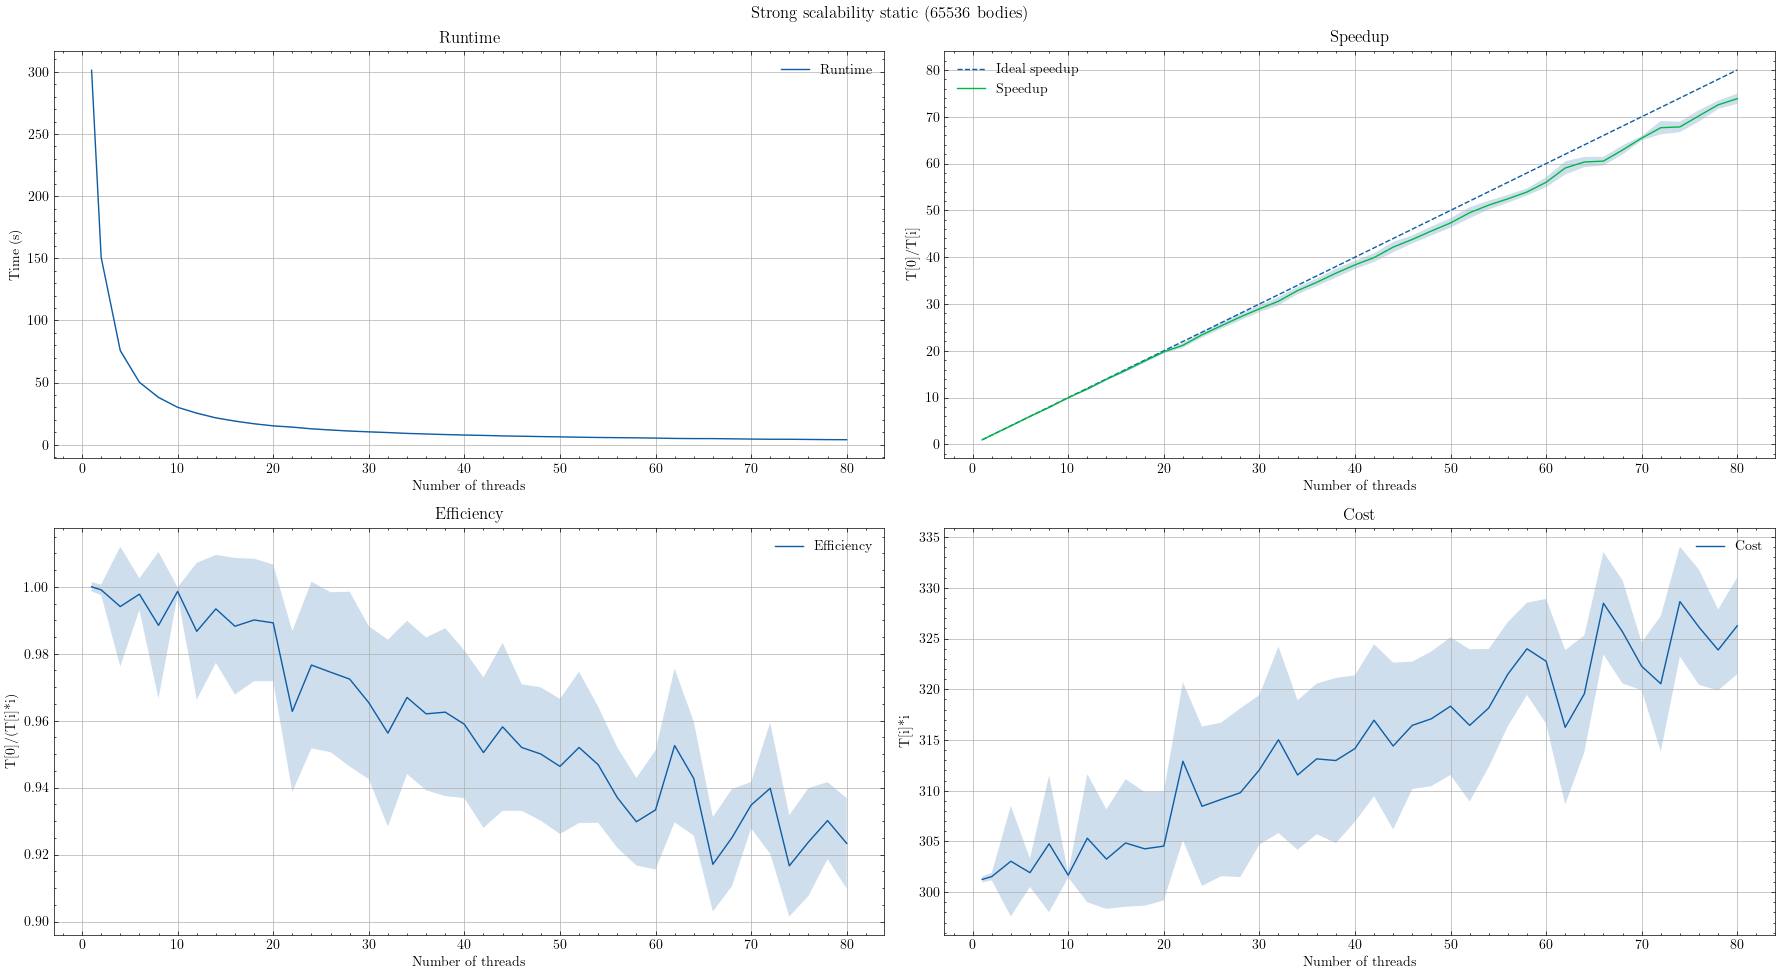

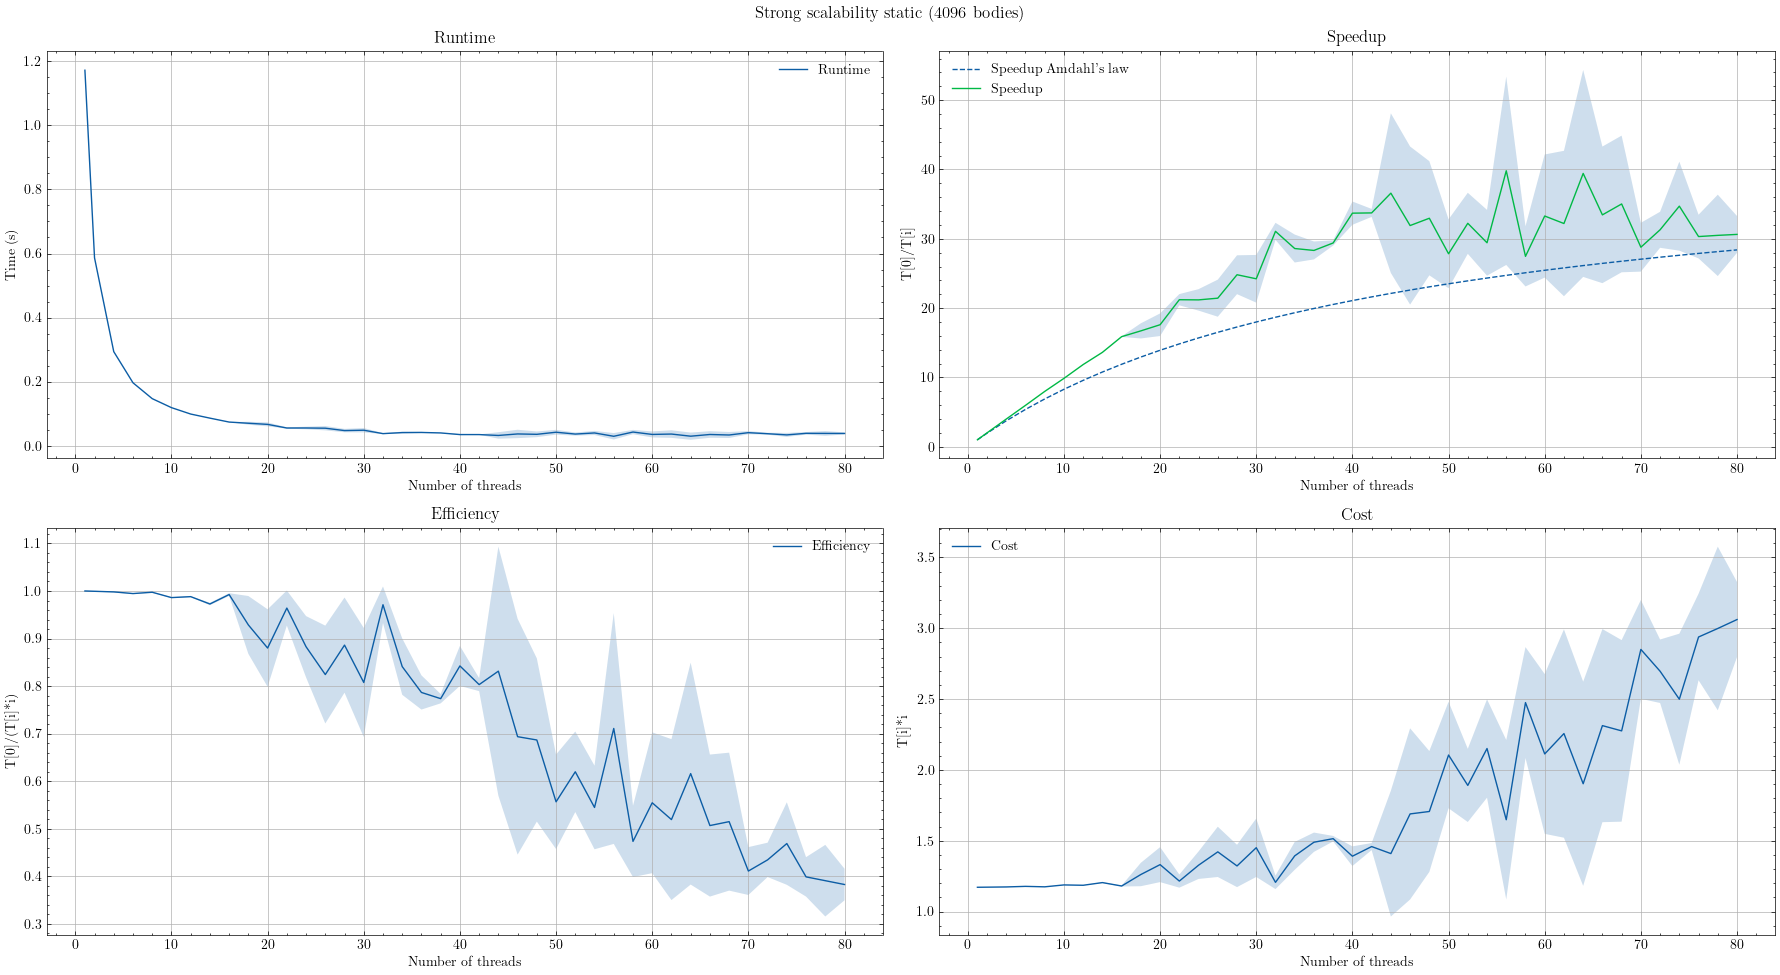

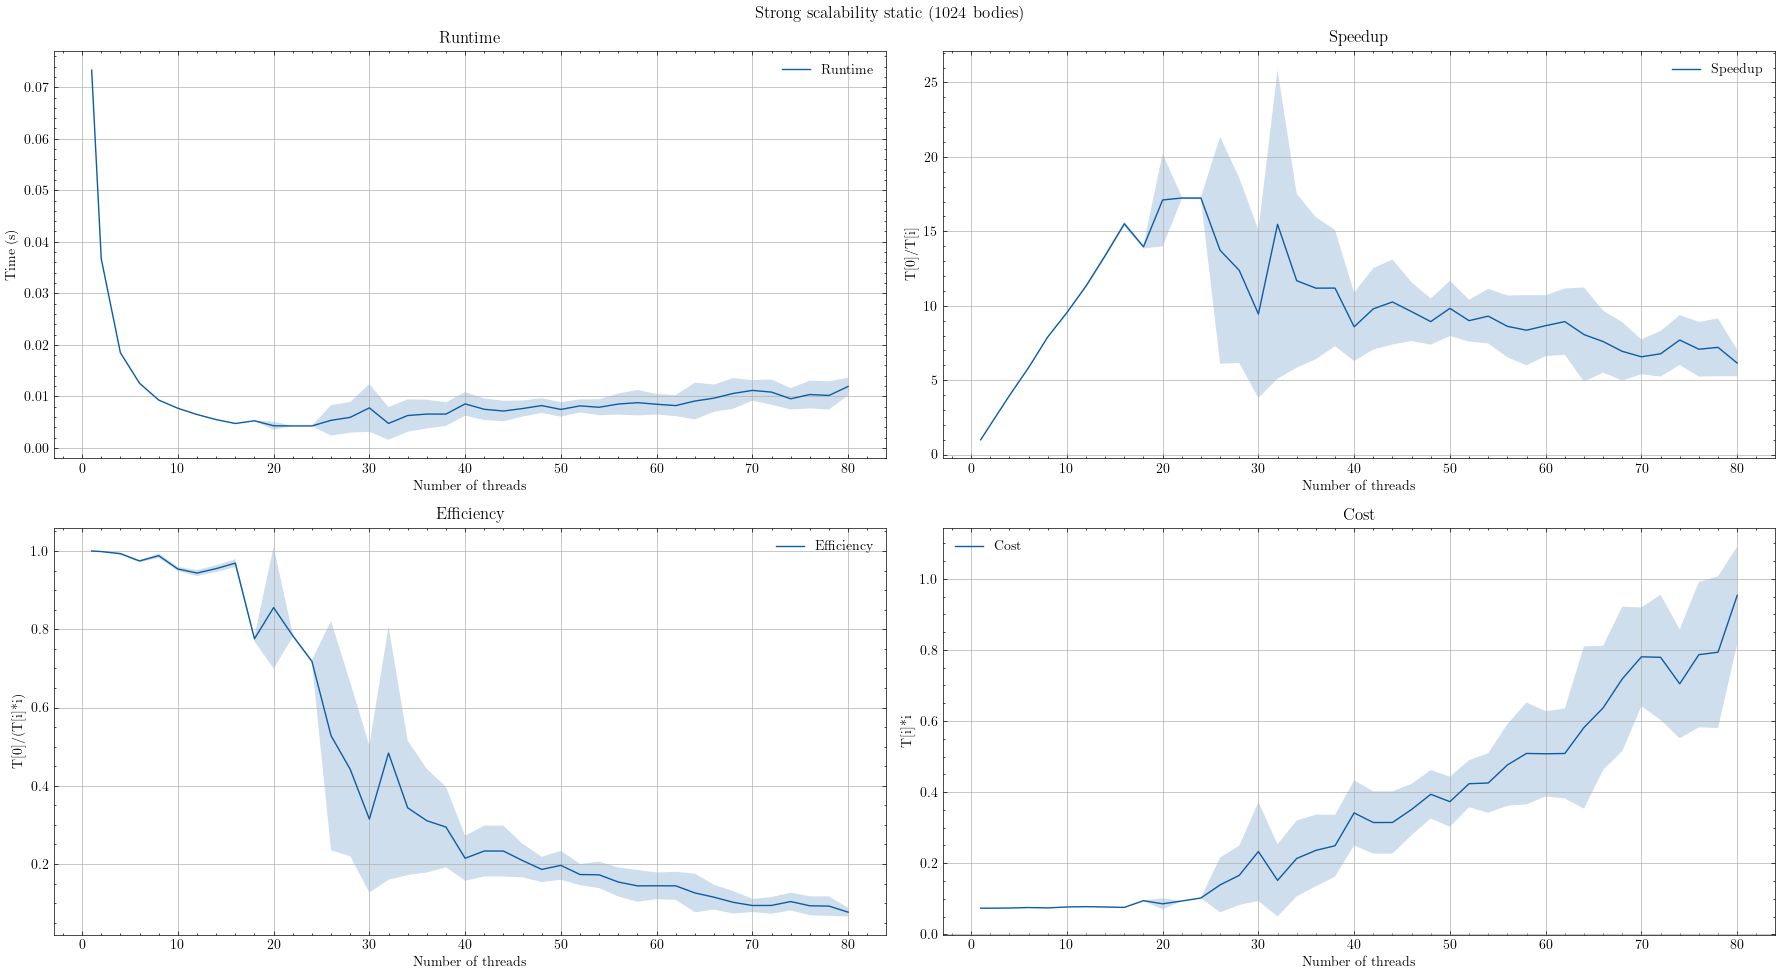

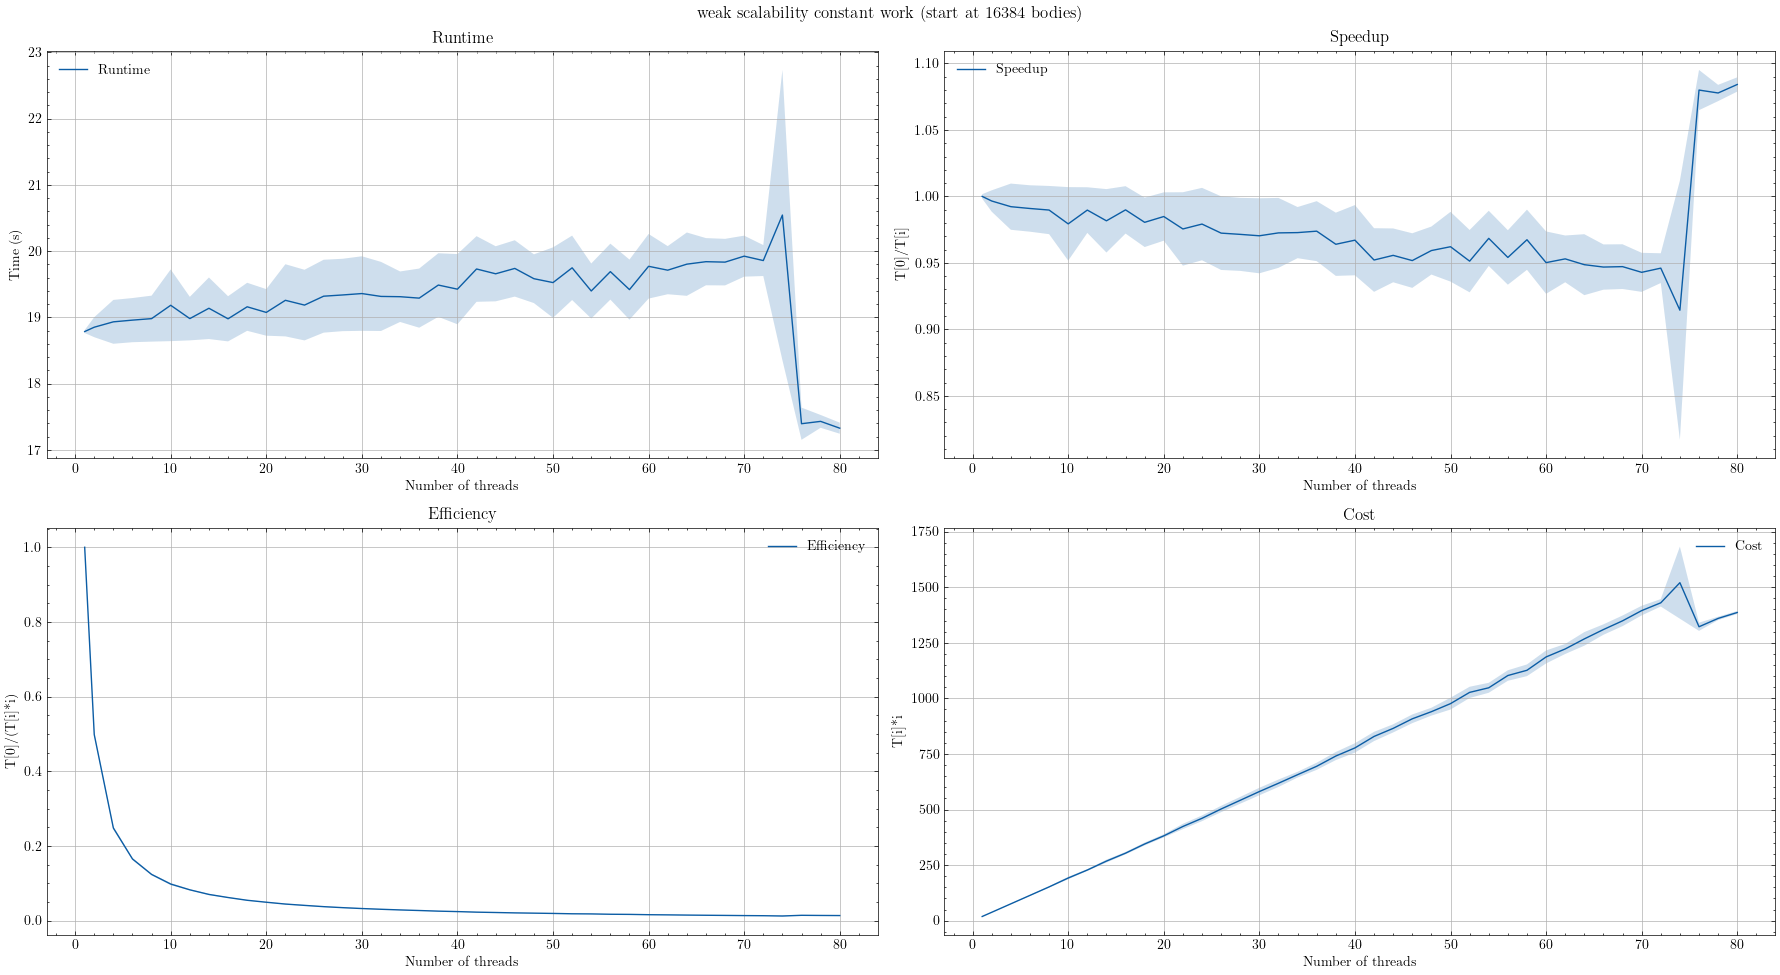

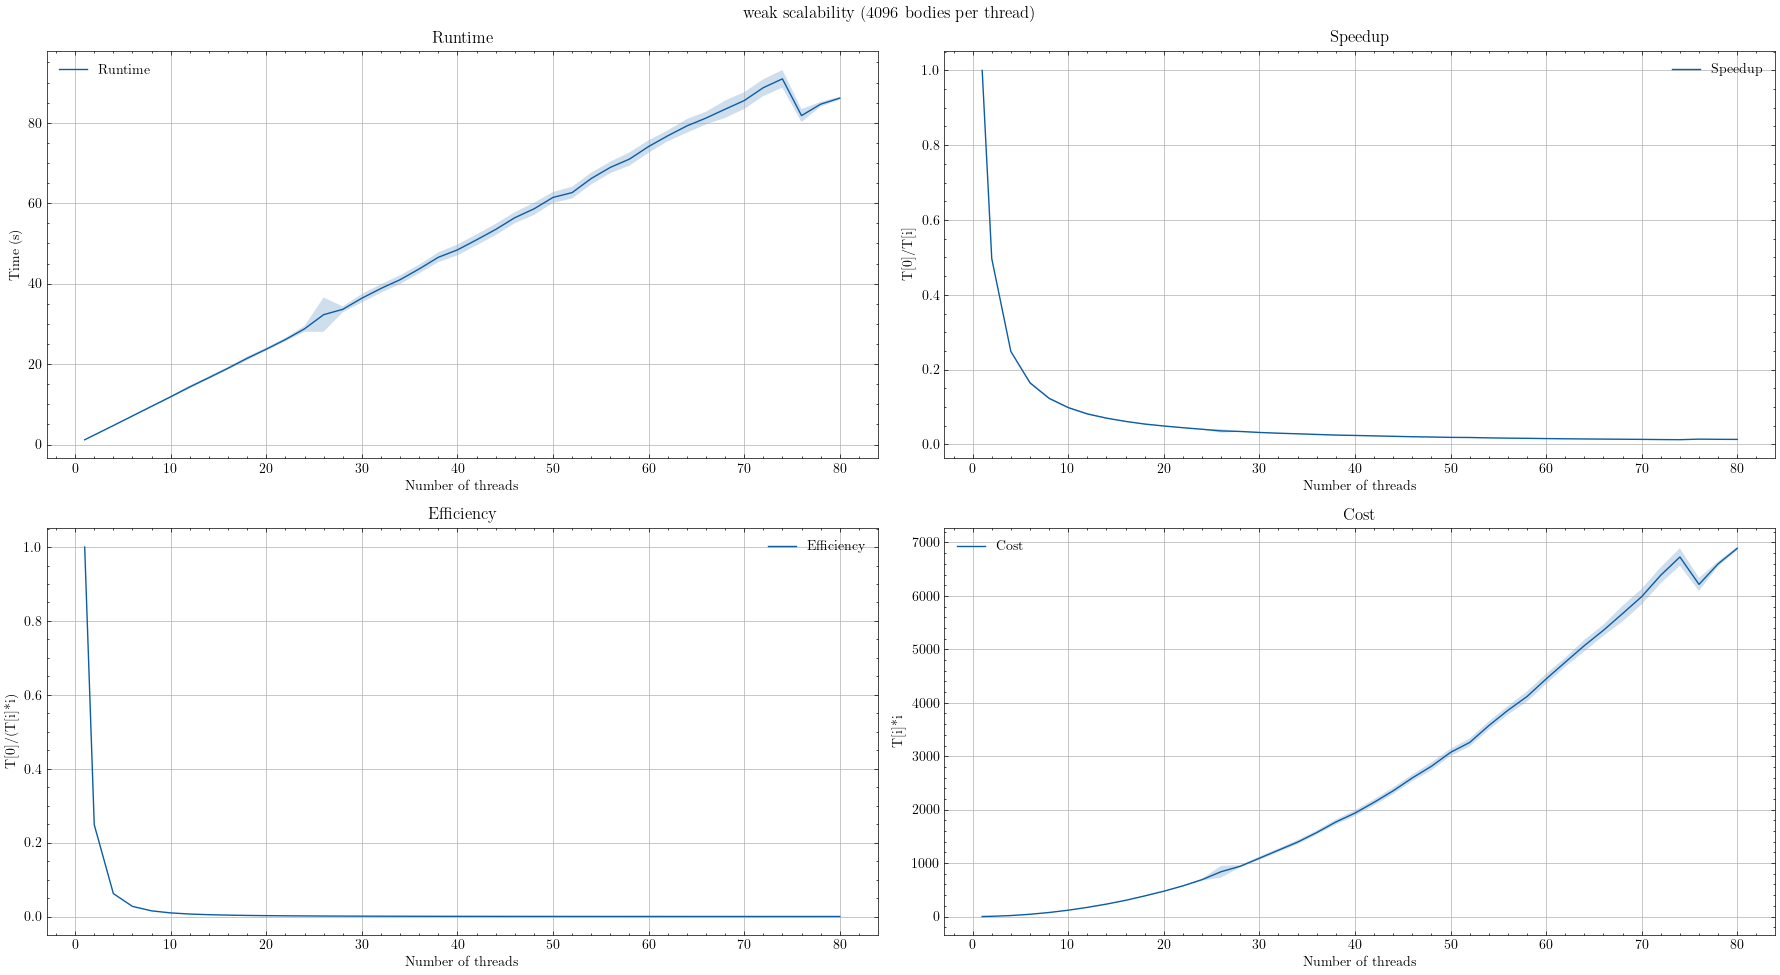

In [20]:
analyze_experiment(raw_data, "strong scalability static 65536", "Strong scalability static (65536 bodies)")
analyze_experiment(raw_data, "strong scalability static 4096", "Strong scalability static (4096 bodies)")
analyze_experiment(raw_data, "strong scalability static 1024", "Strong scalability static (1024 bodies)")
analyze_experiment(raw_data, "weak scalability sqrt step static start at 16384", "weak scalability constant work (start at 16384 bodies)")
analyze_experiment(raw_data, "weak scalability static 4096", "weak scalability (4096 bodies per thread)")